In [1]:
# Load pytorch modules
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader




# what I learnt:

*   dataloader and torchvision transforms

*   Preloaded vision transforms

# What I could have done better:


*   
*   List item





In [2]:
# split to training and test data
train_data = FashionMNIST(root = 'data/', download = True, train = True, transform = ToTensor())
test_data = FashionMNIST(root = 'data/', download = True, train = False, transform=ToTensor())

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 337kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.23MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.1MB/s]


In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [4]:
#Wrap in dataloader to split batch size

train_dataloader = DataLoader(train_data, batch_size = 64, shuffle = True, num_workers = 2)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = False,num_workers = 2)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


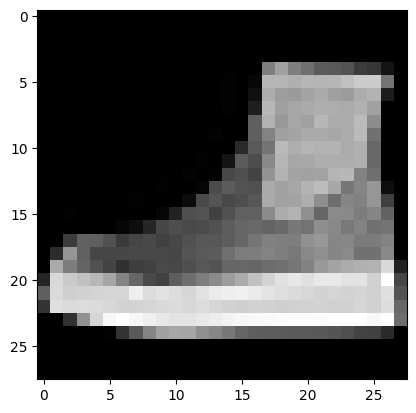

Label: Ankle Boot


In [5]:
# visualising stuff in the train features
import matplotlib.pyplot as plt
train_data, train_label = next(iter(train_dataloader)) # runs through the iterable dataloader
print(f"Feature batch shape: {train_data.size()}")
print(f"Labels batch shape: {train_label.size()}")
img = train_data[1].squeeze()
label = train_label[1]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[label.item()]}")

# what I learnt:
1. next and iter

#what i could do better:
1. look to see whether I can find a modular code for any manual process i can build.

In [6]:
# Build model
# 1. Define model architecture
# 2. Work on working on input flow into the model after designing model architecture.
# 3. work on seeing if there are helper functions

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, padding= 1)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3, padding =1)
    self.conv3 = nn.Conv2d(in_channels =12, out_channels = 32, kernel_size=3, padding=1)
    self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
    self.fc1 = nn.LazyLinear(out_features= 1024)
    self.fc2 = nn.LazyLinear(out_features= 10)

  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, kernel_size=2, stride=2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, kernel_size=2, stride=2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x, kernel_size=2, stride=2)
    x = F.relu(self.conv4(x))
    x = F.max_pool2d(x, kernel_size=2, stride=2)
    x = x.view(x.size(0), -1)
    x = self.fc1(x)
    x = self.fc2(x)

    return x

# what I could have done better:
first pull out the formula for calculating the shape of the pixel arrays.
when designing the architecture.  
pick up a pen and paper and design the architecture and it's part or if using a notion note, just design in there.

# what i learnt:
LazyLinear to avoid calculating input shape

In [7]:
model = CNN()

In [8]:
from torch.optim import Adam
optimizer = Adam(model.parameters(),lr = 0.01)
loss_fn = nn.CrossEntropyLoss()

In [9]:
epochs = 150
train_loss = []
train_acc = []
test_loss = []
test_acc = []
model.train()  # set training mode

for epoch in range(epochs):
    epoch_loss = 0
    epoch_correct = 0
    epoch_total = 0

    for x, y in train_dataloader:
        optimizer.zero_grad()
        y_pred = model(x)                      # call model safely
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()

        # accumulate metrics
        epoch_loss += loss.item() * x.size(0)
        epoch_correct += (y_pred.argmax(1) == y).sum().item()
        epoch_total += x.size(0)

    train_loss.append(epoch_loss / epoch_total)
    train_acc.append(epoch_correct / epoch_total)

    print(f"Epoch {epoch+1}/{epochs} — Loss: {train_loss[-1]:.4f}, Acc: {train_acc[-1]:.4f}")


Epoch 1/150 — Loss: 0.6033, Acc: 0.7758
Epoch 2/150 — Loss: 0.4578, Acc: 0.8368
Epoch 3/150 — Loss: 0.4251, Acc: 0.8481
Epoch 4/150 — Loss: 0.4057, Acc: 0.8548
Epoch 5/150 — Loss: 0.3952, Acc: 0.8586
Epoch 6/150 — Loss: 0.3884, Acc: 0.8624
Epoch 7/150 — Loss: 0.3890, Acc: 0.8624
Epoch 8/150 — Loss: 0.3816, Acc: 0.8640
Epoch 9/150 — Loss: 0.3761, Acc: 0.8665
Epoch 10/150 — Loss: 0.3802, Acc: 0.8654
Epoch 11/150 — Loss: 0.3731, Acc: 0.8682
Epoch 12/150 — Loss: 0.3736, Acc: 0.8671
Epoch 13/150 — Loss: 0.3790, Acc: 0.8664
Epoch 14/150 — Loss: 0.3633, Acc: 0.8710
Epoch 15/150 — Loss: 0.3802, Acc: 0.8663
Epoch 16/150 — Loss: 0.3720, Acc: 0.8688
Epoch 17/150 — Loss: 0.3617, Acc: 0.8714
Epoch 18/150 — Loss: 0.3684, Acc: 0.8694
Epoch 19/150 — Loss: 0.3667, Acc: 0.8703
Epoch 20/150 — Loss: 0.3651, Acc: 0.8704
Epoch 21/150 — Loss: 0.3574, Acc: 0.8731
Epoch 22/150 — Loss: 0.3616, Acc: 0.8707
Epoch 23/150 — Loss: 0.3561, Acc: 0.8736
Epoch 24/150 — Loss: 0.3678, Acc: 0.8705
Epoch 25/150 — Loss: 0.36

#what i learnt:
1. calling model.foward(x) directly just pulls out the forward method and doesn't taking into account other stuff built into the model like train and evaluate.
2. Don't assume the way you learnt how to build stuff is the standard way.

# what i could do better:
1. Look for the standard way a framework is used and build adaptations from there.
2. Don't try to adapt with limited knowledge. Recipe for error.